# 1. Boston 주택 가격 예측 모델

### 데이터 로드 및 전처리

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data /std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = test_data - mean
test_data = test_data /std

### 모델 구성 및 컴파일

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 모델 구성
model = Sequential([
    Dense(100, activation='relu', input_shape=(train_data.shape[1], ), name='dense1'),
    Dense(64, activation='relu', name='dense2'),
    Dense(32, activation='relu', name='dense3'),
    Dense(1, name='output')
])

# 모델 컴파일
model.compile(loss='mse',
              optimizer=Adam(learning_rate=1e-2),
              metrics=['mae'])


### 모델 학습

In [5]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels))

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 585.4102 - mae: 22.4275 - val_loss: 573.6788 - val_mae: 22.2183
Epoch 2/20
1/1 [==============================] - 0s 24ms/step - loss: 546.4224 - mae: 21.5514 - val_loss: 525.6750 - val_mae: 21.1422
Epoch 3/20
1/1 [==============================] - 0s 41ms/step - loss: 500.4177 - mae: 20.4806 - val_loss: 456.5927 - val_mae: 19.4715
Epoch 4/20
1/1 [==============================] - 0s 18ms/step - loss: 434.2239 - mae: 18.8371 - val_loss: 364.0143 - val_mae: 17.0781
Epoch 5/20
1/1 [==============================] - 0s 19ms/step - loss: 346.3054 - mae: 16.4992 - val_loss: 254.7317 - val_mae: 14.0937
Epoch 6/20
1/1 [==============================] - 0s 18ms/step - loss: 244.1512 - mae: 13.4719 - val_loss: 151.3435 - val_mae: 10.7523
Epoch 7/20
1/1 [==============================] - 0s 18ms/step - loss: 150.4313 - mae: 10.2065 - val_loss: 99.9599 - val_mae: 8.0704
Epoch 8/20
1/1 [==============================] - 0s 19ms/s

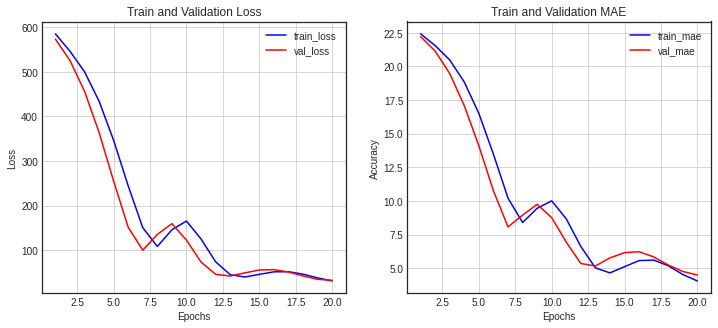

In [6]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가 및 예측

In [7]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 32.4172 - mae: 4.4936


[32.41719055175781, 4.493627071380615]

# 2. Reuters 딥러닝 모델

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout, Flatten

In [49]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
from keras.datasets import reuters
import numpy as np
from sklearn.model_selection import train_test_split

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels,
                                                  test_size=0.25,
                                                  random_state=123)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [50]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)


In [51]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
#배치정규화 포함
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(Dropout(0.5))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(Dropout(0.5))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
batch_normalization_8 (Batch (None, 128)               512       
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
_________________________________________________________________
activation_9 (Activation)    (None, 128)              

In [52]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('reuters.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
211/211 [==============================] - 2s 7ms/step - loss: 1.8643 - accuracy: 0.5778 - val_loss: 1.4585 - val_accuracy: 0.6803
Epoch 2/60
211/211 [==============================] - 1s 5ms/step - loss: 1.2564 - accuracy: 0.7104 - val_loss: 1.1735 - val_accuracy: 0.7471
Epoch 3/60
211/211 [==============================] - 1s 5ms/step - loss: 1.0452 - accuracy: 0.7543 - val_loss: 1.1768 - val_accuracy: 0.7694
Epoch 4/60
211/211 [==============================] - 1s 5ms/step - loss: 0.9418 - accuracy: 0.7761 - val_loss: 1.1915 - val_accuracy: 0.7769
Epoch 5/60
211/211 [==============================] - 1s 5ms/step - loss: 0.8542 - accuracy: 0.7993 - val_loss: 1.1919 - val_accuracy: 0.7716
Epoch 6/60
211/211 [==============================] - 1s 5ms/step - loss: 0.7834 - accuracy: 0.8196 - val_loss: 1.1972 - val_accuracy: 0.7783
Epoch 7/60
211/211 [==============================] - 1s 5ms/step - loss: 0.7186 - accuracy: 0.8269 - val_loss: 1.2333 - val_accuracy: 0.7778
Epoch 

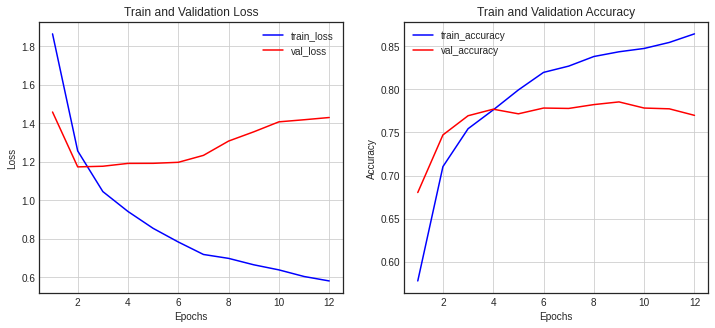

In [53]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [54]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.1990 - accuracy: 0.7449


[1.1989854574203491, 0.7448797821998596]

# 3. CIFAR10

### 데이터 로드 및 전처리

In [31]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout, Flatten


from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [32]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [33]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [34]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [35]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

# One-hot encode the target labels -> 하는 이유?????
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

### 모델 구성 및 컴파일

In [36]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))  # Flatten the 32x32x3 input images to a 1D vector ?????
model.add(Dense(64, name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(Dropout(0.5))
model.add(layers.Dense(32, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax', name='output'))


model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
input (Dense)                (None, 64)                196672    
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
hidden (Dense)               (None, 32)                2080      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32)               

### 모델 학습

In [38]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('cifar10.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1250/1250 [==============================] - 6s 4ms/step - loss: 2.1063 - accuracy: 0.2393 - val_loss: 1.8591 - val_accuracy: 0.3341
Epoch 2/60
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9252 - accuracy: 0.2990 - val_loss: 1.8043 - val_accuracy: 0.3503
Epoch 3/60
1250/1250 [==============================] - 4s 4ms/step - loss: 1.8885 - accuracy: 0.3165 - val_loss: 1.7331 - val_accuracy: 0.3772
Epoch 4/60
1250/1250 [==============================] - 4s 4ms/step - loss: 1.8598 - accuracy: 0.3287 - val_loss: 1.7270 - val_accuracy: 0.3823
Epoch 5/60
1250/1250 [==============================] - 4s 4ms/step - loss: 1.8383 - accuracy: 0.3407 - val_loss: 1.7210 - val_accuracy: 0.3727
Epoch 6/60
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8279 - accuracy: 0.3420 - val_loss: 1.7687 - val_accuracy: 0.3749
Epoch 7/60
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8097 - accuracy: 0.3530 - val_loss: 1.6882 - val_accuracy:

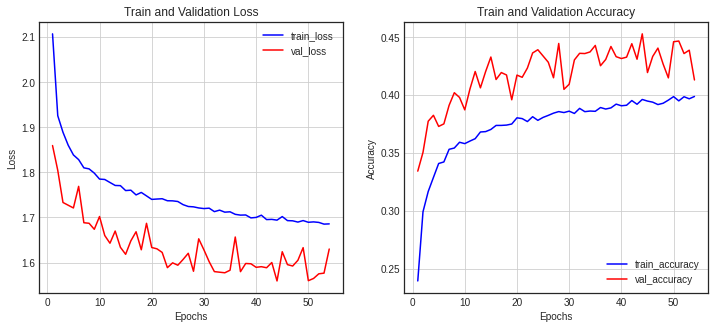

In [39]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [40]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5461 - accuracy: 0.4547


[1.5460515022277832, 0.4546999931335449]